# Custom Training, Layers, and Testing

I am going to combine the last 3 sections into this single notebook. [Custom Training: basics](https://www.tensorflow.org/tutorials/eager/custom_training), [Custom layers](https://www.tensorflow.org/tutorials/eager/custom_layers), and [Custom Training: walkthrough](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough).  

This will be an interesting trip as I have only used Keras for training on actual projects and have some some fitting in class but not with TensorFlow. I do think something like this is good to help understand the gears of how a model works. Keras hides all of this but you still need to understand it.

## Custom Training: Basics

In [1]:
import tensorflow as tf
tf.enable_eager_execution() #Remember that v2 will have this on by default

From the text: Tensors in TF are immutable stateless objects. ML needs to have ever changing states. Luckily, python is a stateful programming language

In [2]:
x = tf.zeros([10,10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


TensorFlow does have stateful operations built in. For example, in a model it is convenient and efficient to use TensorFlow variables. I was just introduced to them while I was converting a previous TF project to v2 since I couldn't use the place holders.

In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0 #Ensure it is really 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

**Fitting a linear model**  
This problems always caused me pause because I try and make them harder than they need to be. I also seem to struggle with wrapping my head around multi-dimensional graphs.  

This will come in 4 parts  
* Define the model  
* Define a loss function  
* Obtain training data  
* Run through training data and use an "optimizer" to adjust the variables  


**Define the model**

In [5]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0) #Weight
        self.b = tf.Variable(0.0) #Bias
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0 #5.0 (weight) * X (variable) + b (bias)

**Define a loss function**  
A loss function measure how well you are doing during training. It determines how well the input matches the output.  

Here we will use the standard L2 loss function

In [6]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

**Obtain training data**

In [7]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

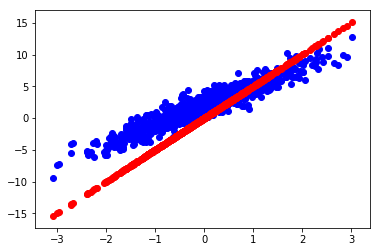

Current loss: 
8.938526


In [8]:
#Plot the current model
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

**Define a training loop**  
We will use stochastic gradient descent to adjust the variables to minimize the loss (difference between expected and actual).

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.93853
Epoch  1: W=4.61 b=0.40, loss=6.12615
Epoch  2: W=4.30 b=0.72, loss=4.31017
Epoch  3: W=4.04 b=0.98, loss=3.13744
Epoch  4: W=3.84 b=1.18, loss=2.38001
Epoch  5: W=3.67 b=1.35, loss=1.89077
Epoch  6: W=3.54 b=1.48, loss=1.57471
Epoch  7: W=3.43 b=1.58, loss=1.37050
Epoch  8: W=3.35 b=1.67, loss=1.23856
Epoch  9: W=3.27 b=1.73, loss=1.15328


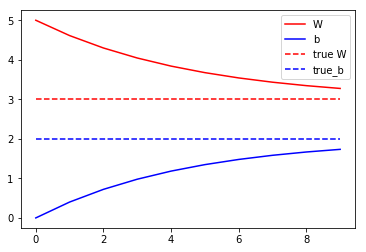

In [10]:
model = Model()

#Collect histories to plot
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
    
#Plot All The Things
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W','b','true W', 'true_b'])
plt.show()

## Custom Layers

This section is building custom layers that would normally be done with *keras.layers*.

In [11]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(10, input_shape=(None,5))

In [12]:
layer(tf.zeros([10,5]))

<tf.Tensor: id=731, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
#Check the trainable variables for each tensor object
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.23094189,  0.06348073,  0.02718323, -0.40510726,  0.04415697,
         -0.42273542,  0.17979628, -0.19385391,  0.05148983, -0.07007742],
        [-0.45589864,  0.21968108,  0.04630387, -0.62175643, -0.54956806,
          0.36805338,  0.06962144,  0.00430626,  0.031443  , -0.20818433],
        [-0.47453225, -0.01458627, -0.5930988 , -0.5316438 , -0.44804132,
         -0.34563407,  0.25458574, -0.5099404 , -0.42170388,  0.2963159 ],
        [-0.42549515, -0.5287014 , -0.15480691,  0.24445653,  0.13021183,
          0.3782106 , -0.61899835, -0.40430504,  0.35701942, -0.23394665],
        [ 0.44224268, -0.13120615, -0.56639266, -0.2017586 ,  0.03027064,
         -0.15569463,  0.5883978 , -0.00228399,  0.21583313, -0.1011498 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [16]:
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.23094189,  0.06348073,  0.02718323, -0.40510726,  0.04415697,
         -0.42273542,  0.17979628, -0.19385391,  0.05148983, -0.07007742],
        [-0.45589864,  0.21968108,  0.04630387, -0.62175643, -0.54956806,
          0.36805338,  0.06962144,  0.00430626,  0.031443  , -0.20818433],
        [-0.47453225, -0.01458627, -0.5930988 , -0.5316438 , -0.44804132,
         -0.34563407,  0.25458574, -0.5099404 , -0.42170388,  0.2963159 ],
        [-0.42549515, -0.5287014 , -0.15480691,  0.24445653,  0.13021183,
          0.3782106 , -0.61899835, -0.40430504,  0.35701942, -0.23394665],
        [ 0.44224268, -0.13120615, -0.56639266, -0.2017586 ,  0.03027064,
         -0.15569463,  0.5883978 , -0.00228399,  0.21583313, -0.1011498 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

**Implementing Custom Layers**  
I have never done this before so this was also interesting. I don't know if I will ever be in a situation to do this but it will be handy to have it.

In [18]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self,num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)
    
layer = MyDenseLayer(10)
print(layer(tf.zeros([10,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.44628054, -0.01872784,  0.03775793,  0.33660483,  0.24217433,
         0.56332034, -0.40987974, -0.2229039 ,  0.5479608 , -0.59185797],
       [ 0.27436328,  0.3015436 ,  0.3526969 , -0.587441  ,  0.08196038,
         0.0659799 ,  0.11645865,  0.3049655 ,  0.18364125,  0.11761856],
       [ 0.06960881, -0.46586096, -0.01633739,  0.5495692 , -0.15964094,
        -0.2819932 ,  0.09016919, -0.619078  ,  0.49734908, -0.1849474 ],
       [ 0.10292339, -0.15812081,  0.36772543,  0.01546222,  0.2384994 ,
        -0.5009727 , -0.07094193, 

**Models: Composing Layers**

In [19]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1,1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1,1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)

block = ResnetIdentityBlock(1, [1,2,3])
print(block(tf.zeros([1,2,3,3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization/gamma:0', 'resnet_identity_block/batch_normalization/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_1/gamma:0', 'resnet_identity_block/batch_normalization_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_2/gamma:0', 'resnet_identity_block/batch_normalization_2/beta:0']


Using the *Sequential* model where you call layer after layer

In [20]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1)),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(2, 1, 
                                                      padding='same'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Conv2D(3, (1, 1)),
                               tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: id=1255, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## Custom Training: Walkthrough

This is a full walkthrough and will pull everything together. It follows the standard approach (build model, train, and test).

In [21]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
tf.enable_eager_execution()

print('TensorFlow version: {}'.format(tf.__version__))
print('Eager Execution: {}'.format(tf.executing_eagerly()))

TensorFlow version: 1.12.0
Eager Execution: True


**Iris Dataset**  
We are going to use the well known Iris dataset that everyone in ML has probably used during class.

In [22]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: C:\Users\nurl_\.keras\datasets\iris_training.csv


The dataset contains a header row so we need to account for that. After that each row contains 4 features (sepal length, sepal width, petal length, and petal width) and 1 label (species)

In [28]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1] #Use all BUT the last column
label_name = column_names[-1] #Use just the last entry
    
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


Because the dataset has a string value for the label (ex: Iris Setosa) we need to eventually convert to integer values

In [29]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [40]:
batch_size = 32

#Generate the dataset from CSV
train_dataset = tf.contrib.data.make_csv_dataset( 
    train_dataset_fp, batch_size, 
    column_names=column_names, label_name=label_name, num_epochs=1)

**Checking out the features**  
With eager execution (default in v2) we can iterate through the dataset to check out the values. Notice that there are 32 in each array because that is how we set the *batch_size* value.

In [32]:
features, labels = next(iter(train_dataset))
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=1329, shape=(32,), dtype=float32, numpy=
              array([6. , 5.1, 5.7, 6. , 4.8, 6.3, 6.4, 5.8, 4.6, 5.2, 6.3, 5. , 5.4,
                     5.6, 5.8, 5. , 6.1, 5.2, 5.1, 5.4, 5.7, 7.3, 6. , 4.6, 7.4, 4.7,
                     6.1, 5. , 5.7, 7.2, 5.5, 5.7], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=1330, shape=(32,), dtype=float32, numpy=
              array([3. , 3.7, 2.9, 2.9, 3. , 2.5, 2.8, 2.6, 3.1, 2.7, 2.7, 3.6, 3.9,
                     2.5, 2.8, 3.4, 2.9, 3.4, 3.8, 3.9, 3.8, 2.9, 2.7, 3.6, 2.8, 3.2,
                     2.8, 2.3, 4.4, 3. , 3.5, 3. ], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=1327, shape=(32,), dtype=float32, numpy=
              array([4.8, 1.5, 4.2, 4.5, 1.4, 5. , 5.6, 4. , 1.5, 3.9, 4.9, 1.4, 1.7,
                     3.9, 5.1, 1.5, 4.7, 1.4, 1.5, 1.3, 1.7, 6.3, 5.1, 1. , 6.1, 1.6,
                     4. , 3.3, 1.5, 5.8, 1.3,

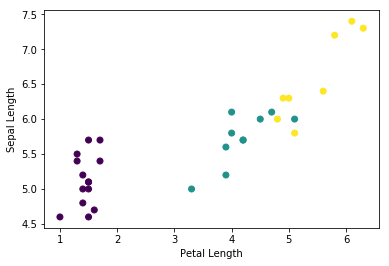

In [33]:
plt.scatter(features['petal_length'].numpy(),
           features['sepal_length'].numpy(),
           c=labels.numpy(),
           cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

**Stacking**  
I have never done this before but this allows us to create a combined tensor

In [38]:
def pack_features_vector(features, labels):
    #Pack the features
    features = tf.stack(list(features.values()), axis=1)
    return features, labels


In [41]:
train_dataset = train_dataset.map(pack_features_vector)

In [42]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[4.8 3.1 1.6 0.2]
 [5.8 4.  1.2 0.2]
 [5.2 2.7 3.9 1.4]
 [5.1 3.8 1.9 0.4]
 [5.7 3.8 1.7 0.3]], shape=(5, 4), dtype=float32)


**Model**  
We are going to create a simple Keras Sequential model will 3 Dense layers. Setting the input and output to 4 and 3 to match what we are using.

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [45]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=1538, shape=(5, 3), dtype=float32, numpy=
array([[-0.35947892,  0.66952586,  0.04513769],
       [-0.27204287,  0.7903625 ,  0.22115125],
       [-0.7084639 ,  1.186043  , -0.24324548],
       [-0.44664654,  0.7781627 , -0.01503657],
       [-0.4056315 ,  0.79794437,  0.08779055]], dtype=float32)>

Using the *Softmax* function to give us a percentage for each class.  
This function will return and array of 3 (our 3 classes and our output size) that will show the percentage that the model thinks that set of data is adding up to 1.0.  
For example, [0.2,0.7,0.1] Would mean there is a 20% change it is the first type, 70% the second type, and 10% chance it is the last type.

In [47]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=1544, shape=(5, 3), dtype=float32, numpy=
array([[0.18878582, 0.52827555, 0.2829386 ],
       [0.1808037 , 0.5231233 , 0.296073  ],
       [0.108206  , 0.7194908 , 0.17230313],
       [0.16825806, 0.57266915, 0.25907275],
       [0.16750635, 0.55813295, 0.2743606 ]], dtype=float32)>

Using *argmax* we can determine which is the favorite for each record. Since there is no training these will not be very good.

In [48]:
print('Prediction: {}'.format(tf.argmax(predictions, axis=1)))
print('    Labels: {}'.format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [0 0 1 0 0 0 1 2 1 2 2 0 0 1 1 1 2 0 0 0 2 0 2 2 1 1 0 1 1 2 2 0]


**Training**  
We now get to train the model to make our predictions a lot better (hopefully).

**Loss Function**  
We need to create a function that will calculate how far off we are from our prediction to the ground truth.  

**Gradient Function**  
We also need to calculate the gradients to optimize our model.

In [50]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(model, features, labels)
print('Loss test: {}'.format(l))

Loss test: 1.4039344787597656


In [58]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

**Optimizer**  
The tutorial has an awesome graphic that shows the difference between the optimizers. They very on speed, how much variation they have, etc.

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [59]:
loss_value, grads = grad(model, features, labels)

print('Step: {}, Initial Loss: {}'.format(global_step.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print('Step: {},         Loss: {}'.format(global_step.numpy(), loss(model, features, labels).numpy()))

Step: 1, Initial Loss: 1.2225792407989502
Step: 2,         Loss: 1.126969814300537


**Training Loop**  
Now that we have shown the first steps of training we need to create a loop to finish the job.

In [60]:
from tensorflow import contrib
tfe = contrib.eager

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
    
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print('Epoch: {:03d}: Loss: {:.3f}, Accuracy: {:.3%}'.format( epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch: 000: Loss: 1.090, Accuracy: 60.000%
Epoch: 050: Loss: 0.352, Accuracy: 95.833%
Epoch: 100: Loss: 0.211, Accuracy: 98.333%
Epoch: 150: Loss: 0.145, Accuracy: 97.500%
Epoch: 200: Loss: 0.120, Accuracy: 98.333%


Through 200 epochs that accuracy got up to 98%

**Visualization**  
We can now visualize the loss over time

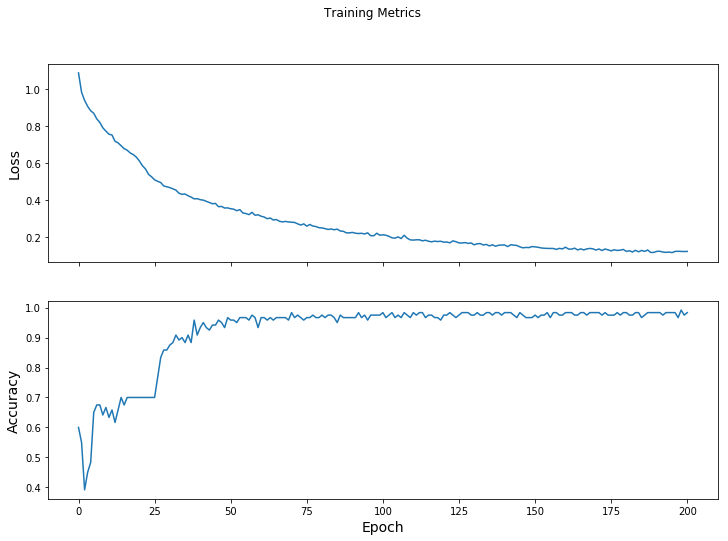

In [61]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12,8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

**Testing**  
Now that we have set up the training dataset and ran some training we will now see how well the model does against the testing dataset. This is all new data that has never been seen before by the model

In [62]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [63]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [64]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


**Prediction**  
After our training and testing we can now use our model to predict.

In [68]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1,]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.4%)
Example 1 prediction: Iris versicolor (93.4%)
Example 2 prediction: Iris virginica (77.5%)
